# Лабораторная работа 8. Линейная и логистическая регрессия

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import plot_line_or_scatter as plt_my
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [6]:
df=pd.read_csv('CO2_emission.csv')
cols_drop = ['Model_Year','Make','Model', 'Transmission', 'Vehicle_Class', 'Fuel_Consumption_comb(L/100km)', 'CO2_Emissions']
df = df.drop(columns=cols_drop)
X=df.iloc[:,:4]
y=df.iloc[:,4]
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)
print(X_sm.shape)
print(X.shape)
df_new_sm=pd.concat([X_sm, y_sm], axis=1)
df_new_sm.shape
df = df_new_sm
df.head(10)

(1210, 4)
(935, 4)


,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Smog_Level
0,2.4,4,9.9,7.0,3
1,3.5,6,11.1,10.8,3
2,2.0,4,11.0,8.6,6
3,2.0,4,11.3,9.1,6
4,2.0,4,11.2,8.0,7
5,2.0,4,11.3,8.1,7
6,2.0,4,10.0,7.2,3
7,2.0,4,10.5,7.7,3
8,2.9,6,13.5,9.3,3
9,2.0,4,10.3,8.1,3


## Подготовка данных

In [7]:
#df['Категория'] = pd.cut(df['Smog_Level'], bins=[0, 4, 7], labels=[0, 1]).astype(int)
#df


df['Категория'] = pd.cut(df['Smog_Level'], bins=[0, 4, 7], labels=[0, 1]).astype(int)
from sklearn import preprocessing
X_train = df.iloc[:,:4]
X_normalized = preprocessing.normalize(X_train, norm='l2')
frame = pd.DataFrame(X_normalized, columns = ['Engine_Size','Cylinders','Fuel_Consumption_in_City(L/100 km)','Fuel_Consumption_in_City_Hwy(L/100 km)'])
frame['Smog_Level'] = df['Smog_Level']
frame['Категория'] = df['Категория']

df = frame
df.head(5)

,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Smog_Level,Категория
0,0.184741,0.307902,0.762057,0.538828,3,0
1,0.206204,0.353492,0.653960,0.636286,3,0
2,0.136412,0.272823,0.750264,0.586570,6,1
3,0.131733,0.263466,0.744291,0.599385,6,1
4,0.138197,0.276395,0.773906,0.552790,7,1


In [8]:
x_y = df[['Fuel_Consumption_in_City(L/100 km)', 'Smog_Level']]
x_y

,Fuel_Consumption_in_City(L/100 km),Smog_Level
0,0.762057,3
1,0.653960,3
2,0.750264,6
3,0.744291,6
4,0.773906,7
...,...,...
1205,0.729245,1
1206,0.713221,1
1207,0.771516,1
1208,0.730297,1


In [9]:
new_ind = np.arange(100)
np.random.shuffle(new_ind)
new_ind #

array([50, 52, 78, 45, 68, 63, 83, 10, 53, 15, 25, 33,  7, 11, 14, 42, 43,
       94,  8, 79, 69, 74, 73,  5, 27, 51, 57, 62, 90, 47, 91, 65,  3, 26,
        1, 98, 40, 92, 12, 31, 61,  9, 97, 21, 34, 30, 82, 89, 77, 96, 38,
       17, 81, 24, 16, 88, 87, 72, 18, 54, 13,  0, 99, 76, 86, 32, 85, 56,
       95, 37, 36, 48,  6, 64, 20, 93, 28, 46, 39, 60, 19, 44, 58, 75, 70,
       71, 84, 23, 66, 59, 49, 67, 41, 80,  4, 35,  2, 55, 22, 29])

In [10]:
train_idx = new_ind[:70]
test_idx = new_ind[70:]

In [11]:
x_y_train = x_y.iloc[train_idx]

<Axes: >

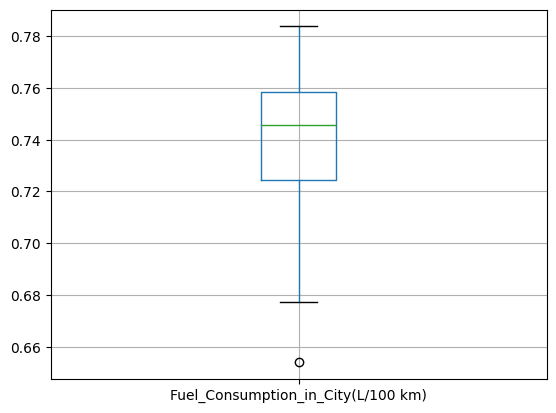

In [12]:
x_y_train.boxplot(column=['Fuel_Consumption_in_City(L/100 km)'])

In [13]:
# используя эти индексы разделим массивы данных на обучающие и тестовые
x_train, y_train = x_y_train['Fuel_Consumption_in_City(L/100 km)'], x_y_train['Smog_Level']# обучающие вход и желаемый выход
x_test, y_test = x_y['Fuel_Consumption_in_City(L/100 km)'][test_idx], x_y['Smog_Level'][test_idx]# тестовые вход и желаемый выход

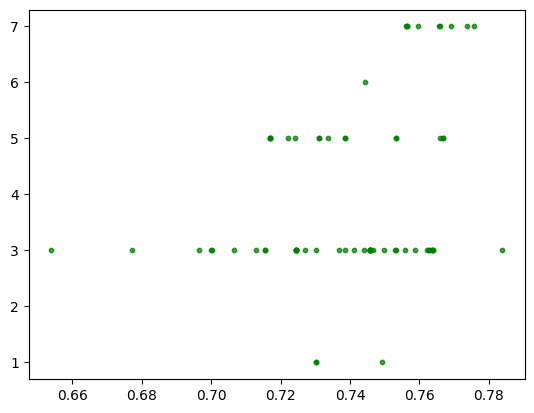

In [14]:
plt_my('scatter', x_train, y_train, color='green') # рисуем обучающие данные, зависимость желаемого выхода от входа
#plt.scatter(x_test, y_test,  color='green')
plt.show()

## Обучение

### Гиперпараметры

In [15]:
lr = 1e-3 # шаг обучения
epochs = 3500 # количество эпох

In [16]:
a =  np.random.randn(1) # случайное число для параметра a
a

array([-1.31902701])

In [17]:
b = np.random.rand(1) # случайное число для параметра b
b

array([0.66829247])

In [18]:
# ЦИКЛ ОБУЧЕНИЯ
Loss=[]# массив для значений функции ошибки
for ep in range(epochs): # в цикле по количеству эпох
    y_pred = b + a*x_train # считаем выход модели для всех примеров входов с текущими значениями параметров модели
    error = (y_pred - y_train) # считаем разницу между полученным выходом и тем, который должен был быть

    loss = (error**2).mean() # считаем суммарную ошибку. Функция среднего mean() как замена суммирования по всем примерам
    Loss.append(loss) # добавлем текущее значение в массив
    b_grad = 2 * error.mean() # считаем производную по параметру, смещению b (на 2 можно не умножать включив его в lr)
    a_grad = 2 * (x_train * error).mean() # считаем производную по параметру, множителю a

    # обучение = изменение параметров
    a = a - lr*a_grad # изменяем параметр a
    b = b - lr*b_grad # изменяем параметр b

    if ep % 20 == 0 or ep==epochs-1: # каждые 20 эпох будем
        print('ep: %3d  loss: %8.6f   a=%4.3f  b=%4.3f'%(ep,loss,a,b)) # печатать значение функции ошибки

ep:   0  loss: 20.388653   a=-1.313  b=0.677
ep:  20  loss: 18.289523   a=-1.191  b=0.841
ep:  40  loss: 16.435250   a=-1.076  b=0.995
ep:  60  loss: 14.797272   a=-0.969  b=1.140
ep:  80  loss: 13.350358   a=-0.867  b=1.276
ep: 100  loss: 12.072222   a=-0.772  b=1.404
ep: 120  loss: 10.943175   a=-0.683  b=1.524
ep: 140  loss: 9.945828   a=-0.598  b=1.637
ep: 160  loss: 9.064818   a=-0.519  b=1.743
ep: 180  loss: 8.286574   a=-0.445  b=1.843
ep: 200  loss: 7.599109   a=-0.375  b=1.937
ep: 220  loss: 6.991834   a=-0.309  b=2.025
ep: 240  loss: 6.455395   a=-0.248  b=2.108
ep: 260  loss: 5.981530   a=-0.190  b=2.186
ep: 280  loss: 5.562938   a=-0.135  b=2.259
ep: 300  loss: 5.193174   a=-0.084  b=2.328
ep: 320  loss: 4.866540   a=-0.035  b=2.392
ep: 340  loss: 4.578007   a=0.010  b=2.453
ep: 360  loss: 4.323129   a=0.053  b=2.510
ep: 380  loss: 4.097982   a=0.093  b=2.564
ep: 400  loss: 3.899096   a=0.130  b=2.614
ep: 420  loss: 3.723409   a=0.166  b=2.661
ep: 440  loss: 3.568215   a=0.

In [19]:
y_test_pred = b + a*x_test # рассчитаем выходы модели на тестовых примерах входов
#у нас уже были соответствующие желаемые тестовые выходы для них в y_test

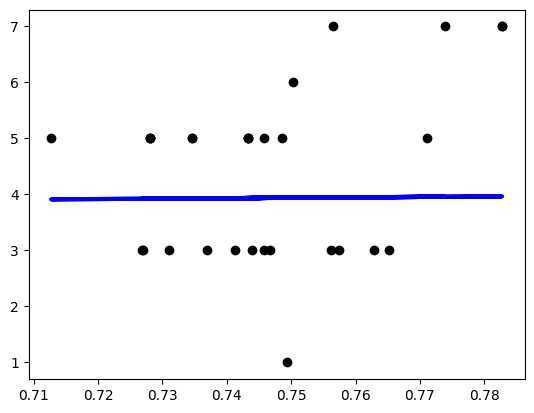

In [20]:
# нарисуем
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_test_pred, color='blue', linewidth=3)
plt.show()

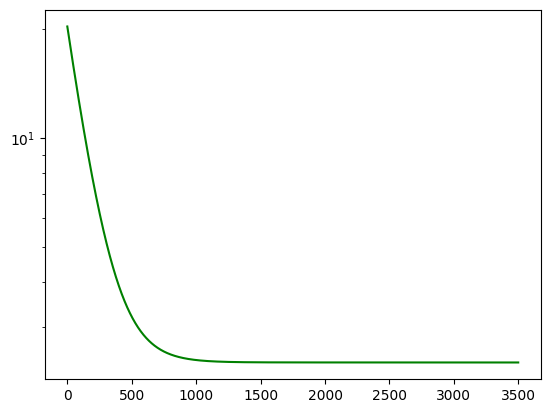

In [21]:
# посмотрим на функцию ошибки
from matplotlib import pyplot as plt  #
plt.plot(np.arange(epochs), Loss, color='green') # рисуем
plt.yscale('log') # логарифмический масштаб для наглядности

## Логистическая регрессия

In [22]:
X=df.iloc[:,:4]
y=df.iloc[:,5]

In [23]:
X

,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km)
0,0.184741,0.307902,0.762057,0.538828
1,0.206204,0.353492,0.653960,0.636286
2,0.136412,0.272823,0.750264,0.586570
3,0.131733,0.263466,0.744291,0.599385
4,0.138197,0.276395,0.773906,0.552790
...,...,...,...,...
1205,0.214582,0.412657,0.729245,0.501867
1206,0.189715,0.379429,0.713221,0.557995
1207,0.261262,0.337112,0.771516,0.472081
1208,0.215769,0.414941,0.730297,0.497930


In [24]:
y

0       0
1       0
2       1
3       1
4       1
       ..
1205    0
1206    0
1207    0
1208    0
1209    0
Name: Категория, Length: 1210, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0) #разбиваем выборку на обучающую и тестовую

In [26]:
#настройка параметров модели
model = LogisticRegression()
y_scor=model.fit(X_train, y_train)
y_score=y_scor.predict(X_test)

In [27]:
print(metrics.classification_report(y_test, y_score))

              precision    recall  f1-score   support

           0       0.82      0.52      0.64       294
           1       0.66      0.89      0.76       311

    accuracy                           0.71       605
   macro avg       0.74      0.71      0.70       605
weighted avg       0.74      0.71      0.70       605



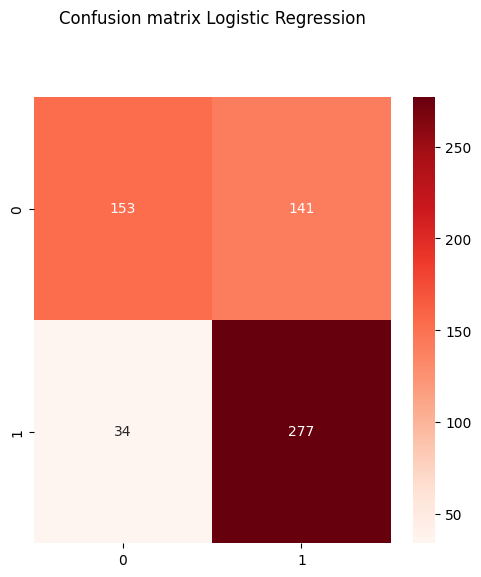

In [28]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (5,5))
ax = fig.gca()
# матрица неточности

cnf_matrix_log = confusion_matrix(y_test, y_score)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)
plt.show()

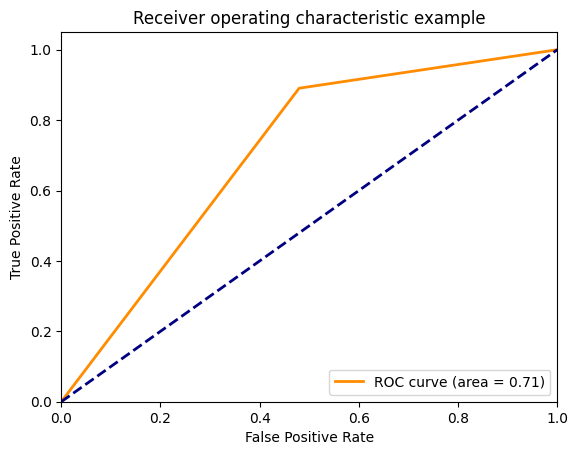

In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
# ROC - анализ
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [30]:
X_cut = X.iloc[:,:4]
X_cut

,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km)
0,0.184741,0.307902,0.762057,0.538828
1,0.206204,0.353492,0.653960,0.636286
2,0.136412,0.272823,0.750264,0.586570
3,0.131733,0.263466,0.744291,0.599385
4,0.138197,0.276395,0.773906,0.552790
...,...,...,...,...
1205,0.214582,0.412657,0.729245,0.501867
1206,0.189715,0.379429,0.713221,0.557995
1207,0.261262,0.337112,0.771516,0.472081
1208,0.215769,0.414941,0.730297,0.497930


In [31]:
X = X.iloc[:,0:4]
X

,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km)
0,0.184741,0.307902,0.762057,0.538828
1,0.206204,0.353492,0.653960,0.636286
2,0.136412,0.272823,0.750264,0.586570
3,0.131733,0.263466,0.744291,0.599385
4,0.138197,0.276395,0.773906,0.552790
...,...,...,...,...
1205,0.214582,0.412657,0.729245,0.501867
1206,0.189715,0.379429,0.713221,0.557995
1207,0.261262,0.337112,0.771516,0.472081
1208,0.215769,0.414941,0.730297,0.497930


In [32]:
X_cut = X.iloc[:, [0, 3]]
X_cut

,Engine_Size,Fuel_Consumption_in_City_Hwy(L/100 km)
0,0.184741,0.538828
1,0.206204,0.636286
2,0.136412,0.586570
3,0.131733,0.599385
4,0.138197,0.552790
...,...,...
1205,0.214582,0.501867
1206,0.189715,0.557995
1207,0.261262,0.472081
1208,0.215769,0.497930


In [38]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_cut, y, test_size=.5, random_state=0) #разбиваем выборку на обучающую и тестовую
yc_test

198     1
1078    0
55      0
834     0
359     1
       ..
350     1
447     0
17      0
1184    0
654     0
Name: Категория, Length: 605, dtype: int64

In [34]:
#настройка параметров модели
model = LogisticRegression()
yc_scor=model.fit(Xc_train, yc_train)
yc_score=yc_scor.predict(Xc_test)

In [35]:
print(metrics.classification_report(yc_test, yc_score))

              precision    recall  f1-score   support

           0       0.83      0.48      0.60       294
           1       0.65      0.91      0.76       311

    accuracy                           0.70       605
   macro avg       0.74      0.69      0.68       605
weighted avg       0.74      0.70      0.68       605



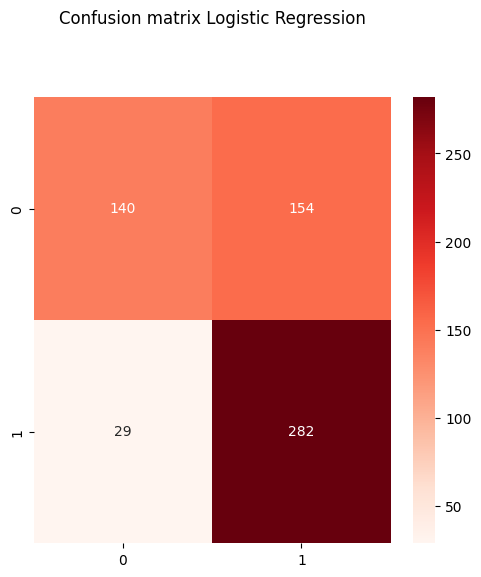

In [36]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (5,5))
ax = fig.gca()
# матрица неточности

cnf_matrix_log = confusion_matrix(yc_test, yc_score)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)
plt.show()

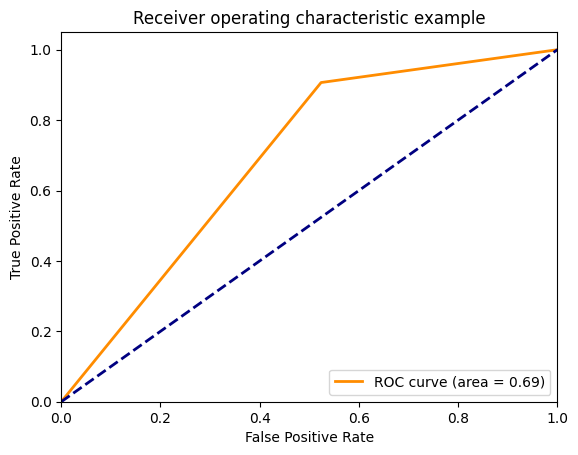

In [37]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
# ROC - анализ
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(yc_test, yc_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()